# Grapghs for Popultation Above 65
## Author = #tusharGitHub13

In [299]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, country_alpha2_to_continent_code


# Import data into Dataframe
df = pd.read_csv(Path('data/world-population-19602018/population_above_age_65_percentage_long.csv'))


    


## Function to display graph for a Country

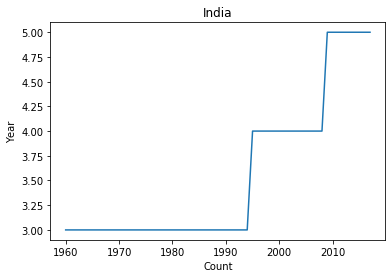

In [300]:
#Funtion to display date for any given Country
def Country_graph(dataframe,country_name):
    """You can get country names by df["County Name"].unique() """
    df_country = dataframe.copy()
    df_country = df_country[df_country['Country Name']==country_name]
    df_country.reset_index(drop=True)
    plt.plot(df_country['Year'],df_country['Count'])
    plt.xlabel("Count")
    plt.ylabel("Year")
    plt.title(country_name)
    
Country_graph(df,'India')

## Prepare data for additional column Continent

In [301]:
# Preparing Continent column based on Country Name values of Dataframe
continents = dict(zip(['AF', 'AS', 'EU', 'NA', 'OC', 'SA'],["Africa",'Asia','Europe','North America','Oceania','South America']))
continent = []
for country in df['Country Name']:
    try:
        continent.append(continents[(country_alpha2_to_continent_code(country_name_to_country_alpha2(country)))])
    except Exception:
        continent.append(np.NaN)
cnt = np.array(continent)   
np.unique(cnt)




array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America', 'nan'], dtype='<U13')

In [297]:
#Adding Continent Column to dataframe, Also updating manually continents name for country which we dont get any value
df_cont = df.copy()
df_cont["Continent"] = np.array(continent)
df_cont.loc[df["Country Name"].isin(['Caribbean small states','Bahamas, The','St. Vincent and the Grenadines','Micronesia, Fed. Sts.','Virgin Islands (U.S.)']),'Continent']= 'North America'
df_cont.loc[df["Country Name"].isin(['Channel Islands']),'Continent']= 'South America'
df_cont.loc[df["Country Name"].isin(['Curacao','Venezuela, RB']),'Continent']= 'Europe'
df_cont.loc[df["Country Name"].isin(["Gambia, The","Egypt, Arab Rep.","Cote d'Ivoire","Congo, Dem. Rep.","Congo, Rep."]),'Continent']= 'Africa'
df_cont.loc[df["Country Name"].isin(['Hong Kong SAR, China','Iran, Islamic Rep.','Timor-Leste','Korea, Rep.','Korea, Dem. People’s Rep.','Macao SAR, China','Lao PDR','Yemen, Rep.','West Bank and Gaza']) ,'Continent']= 'Asia'
df_cont.loc[df["Country Name"] == 'Pacific island small states','Continent']= 'Oceania'
df_cont[df_cont.Continent=='nan']["Country Name"].unique()

array([], dtype=object)

## Function to display graph for Continent

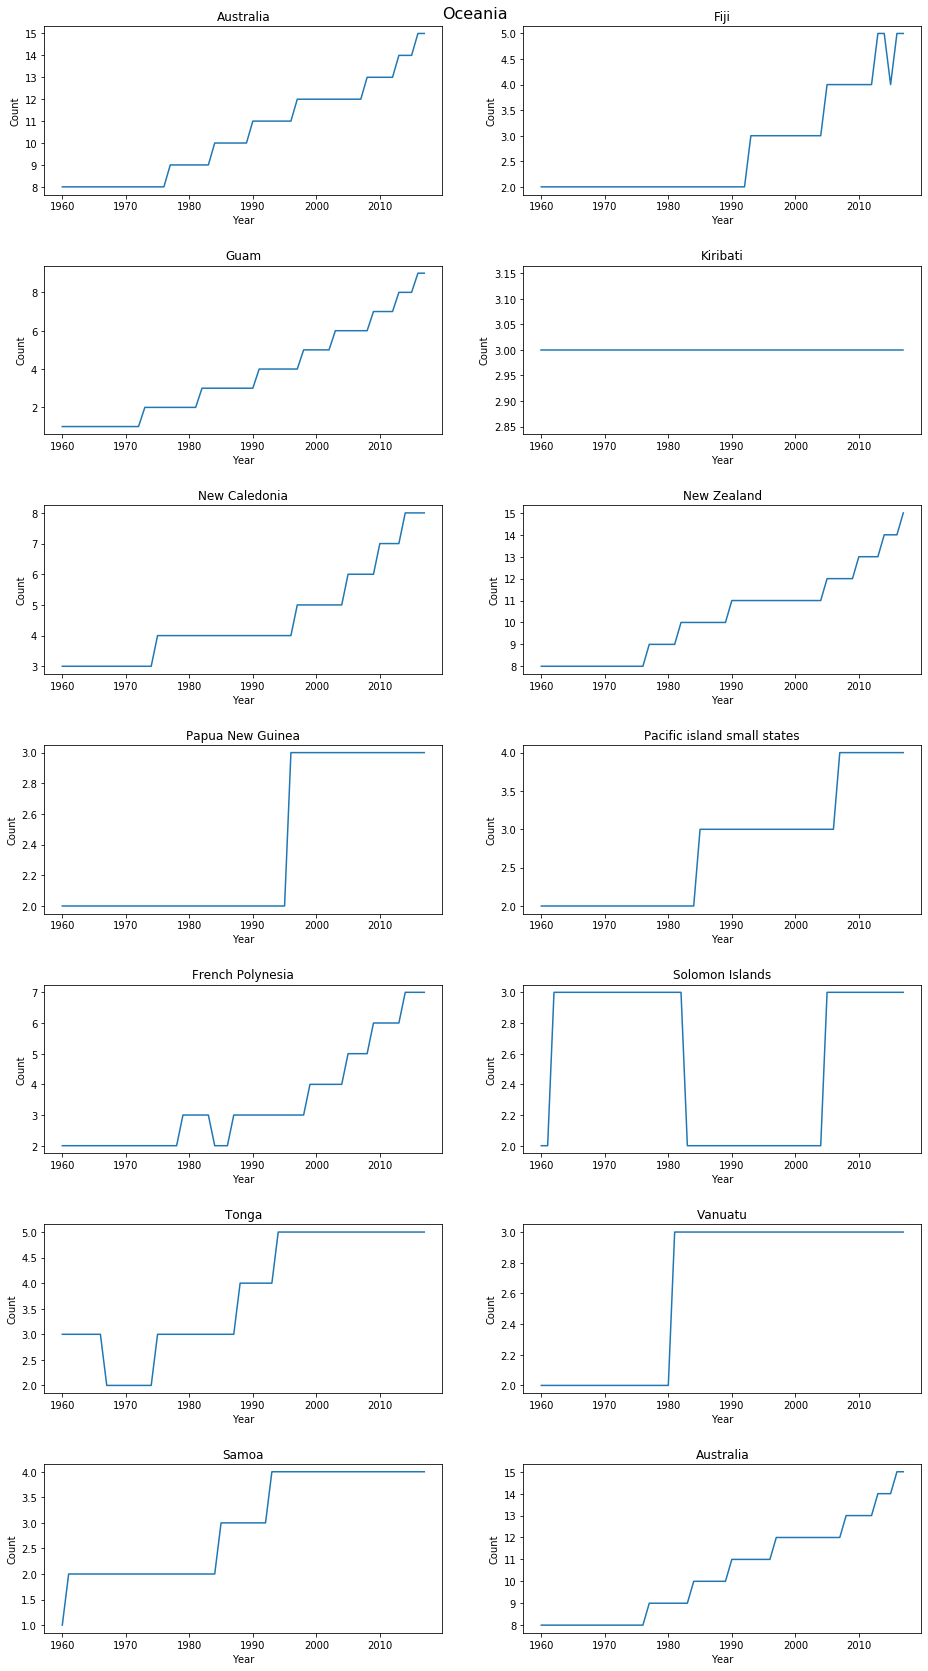

In [302]:
#Function to display graph for all countires in given Continent      
def Continent_graph(dataframe,continent_name):
    df_cont_name = dataframe[dataframe["Continent"] == continent_name]
    fig, axes = plt.subplots(7,2,figsize=(14,24))
    fig.tight_layout(pad=5.0)
    fig.suptitle(name,fontsize=16)
    for ax, country in zip(axes.flat,df_cont_name["Country Name"]):
        df_cont_name_a = df_cont_name[df_cont_name["Country Name"] == country]
        ax.plot(df_cont_name_a['Year'],df_cont_name_a['Count'])
        ax.set_title(country)
        ax.set_xlabel("Year")
        ax.set_ylabel("Count")
                            
    plt.show()

Continent_graph(df_cont_name,'Oceania')

    
